<!--Header-->
<div>
    <div class="row" style="color: #4D4D4D;font-size: 15px;padding-bottom: 20px">
        <div class="col-md-7">
            <img src="https://www.tecazuay.edu.ec/wp-content/uploads/2023/07/LOGO-RECTANGULAR_SIN-FONDO-2048x626.png" alt="Logo TECAZUAY" width="100%" class="img-responsive" style="margin:20px 0px 0px">
        </div>
        <div class="col-md-5">
            <h1 style="margin:15px 0px 0px;font-size: 40px;">Herramientas de Visualización de Datos</h1>
            <div style="text-align:left;margin-top: 5px;"></div>
        </div>
    </div>
    <div class="row" style="background: #FCB517;padding: 10px 20px;">
        <div class="col-md-6">
            <div>CICLO: M3A</div>
        </div>
        <div class="col-md-6">
            <div style="text-align:right;">Autor: Verónica Chimbo <span style="margin-left: 30px;"></span></div>
        </div>
        <div style="text-align:right;">Carrera: TECNOLOGÍA SUPERIOR EN BIG DATA <span style="margin-left: 30px;"></span></div>
         <div style="text-align:right;">Estudiante: Paul Rodriguez  <span style="margin-left: 30px;"></span></div>
          <div style="text-align:right;">Fecha:   <span style="margin-left: 30px;"></span></div>
        </div>
    </div>
</div>
<!--/Header-->

## Introducción

La visualización de datos es una parte imprescindible en la minería de datos. Lo primero que hacemos cuando nos enfrentamos a un nuevo conjunto de datos es el análisis exploratorio que nos permite conocer mejor nuestros datos. En esta fase, ser capaces de crear visualizaciones ayuda notablemente a entender la estructura y ver más claras las relaciones entre las variables, sobretodo cuando nos enfrentamos a _datasets_ grandes o con una alta dimensionalidad.

Podemos ver el análisis visual de los datos incluido en un proceso contínuo de _feedback_ entre la visualización y la construcción de modelos estadísticos, como nos propone Keim (diagrama). Un modelo estadístico más adecuado nos permite crear mejores visualizaciones que a la vez, nos darán pistas para construir modelos más complejos y detallados.

![](images/keim.png)

En esta actividad presentaremos algunas de las librerías más usadas en `Python` para generar visualizaciones y mostraremos ejemplos de cómo generar los gráficos más habituales.

## Librerías de visualización de datos

### Matplotlib

[`Matplotlib`](https://matplotlib.org/) es la librería de visualización de datos más popular, y permite crear visualizaciones de una forma bastante fácil.

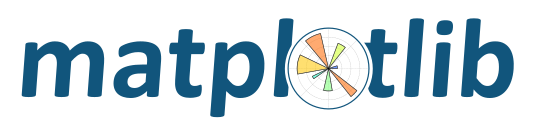

### Seaborn

[`Seaborn`](https://seaborn.pydata.org/) es una librería basada en `Matplotlib` que está enfocada en la visualización de modelos estadíticos. `Seaborn` no pretende substituir `Matplotlib`, sinó complementarla para poder hacer visualizaciones más complejas con una programación de alto nivel y con menos esfuerzo.

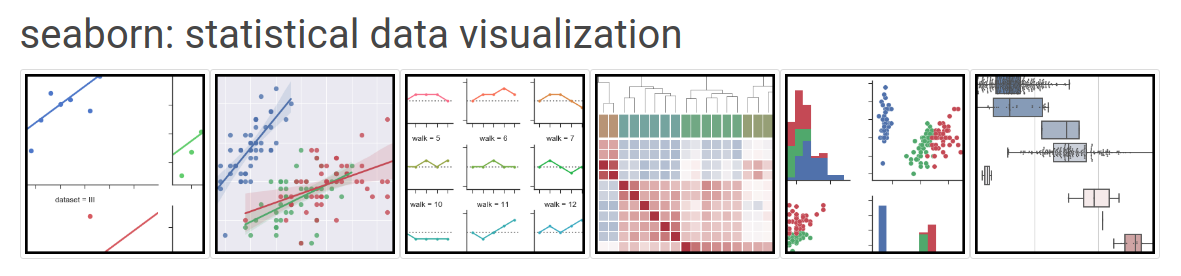

### Bokeh

[`Bokeh`](https://bokeh.pydata.org/en/latest/) es otra librería de visualización de datos enfocada a las visualizaciones interactivas. A diferencia de `Seaborn`, `Bokeh` és independiente de `Matplotlib`. El principal foco de `Bokeh` es la interacción en el web en el estilo de los documentos centrados en datos [D3.js Data-Driven Documents](https://d3js.org/).

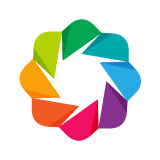![Bokeh](images/bokeh.png)

## _House prices dataset_

El conjunto de datos que usaremos en esta actividad corresponde al _dataset_ [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) que es una de las competiciones de iniciación de [Kaggle](www.kaggle.com).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('/content/drive/MyDrive/Actividad 6/data/gadcuenca_hosteleria_2022septiembre.csv', encoding='latin1')


In [5]:
print(df_train)

        tipo                     nombre  \
0      Hotel                  Americano   
1      Hotel                  Atahualpa   
2      Hotel             Casa de Lidice   
3      Hotel              Cuatro Mundos   
4      Hotel  Cuenca Suites Apart-hotel   
..       ...                        ...   
89  Hosteria              Dos Chorreras   
90  Hosteria             Hosteria Duran   
91  Hosteria            Lago de Cristal   
92  Hosteria          Refugio Calmecatl   
93  Hosteria                      Rodas   

                                            direccion       telefono  \
0     Francisco Tamariz 114 y Av. Heroes de Verdeloma   5937-2837882   
1                        M Sucre 3-50 y Tomas Ordonez   5937-2842345   
2   General Torres 11-69 entre Gaspar Sangurima y ...   5937-2825698   
3   Benigno Malo 10-70 entre Mariscal Lamar y Gran...   5937-2837058   
4                Simon Bolivar 14-65 y Coronel Talbot   5937-2848138   
..                                                .

## Visualizaciones más comunes

A continuación veremos algunas de les visualizaciones más comunes y cómo implementarlas en alguna de las tres librerías que hemos presentado antes.

### Diagrama de barras

El diagrama de barras es una de las visualizaciones más comunes. Nos muestra la relación entre una variable numérica y otra de categórica. Por ejemplo, podemos mostrar la relación entre el número de baños de una vivenda y el precio de venda medio.

En este ejemplo, primero calcularemos el precio medio de venta por número de baños y después usaremos la función `plot` de `Matplotlib` para visualizarla.

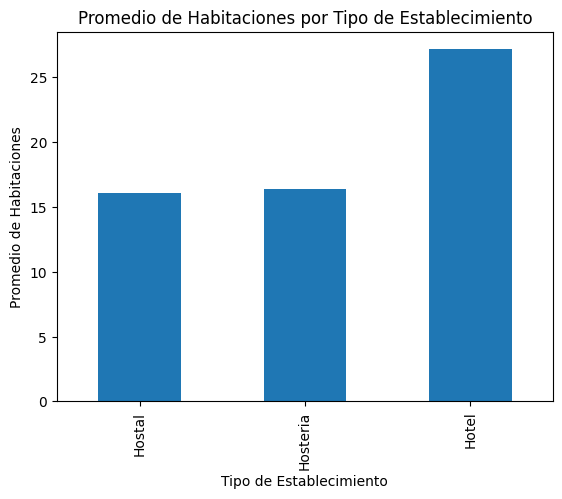

In [7]:
df_train['nro_habitaciones'] = pd.to_numeric(df_train['nro_habitaciones'].replace('ND', np.nan))

# Crear la tabla pivot
pivot = df_train.pivot_table(index='tipo', values='nro_habitaciones', aggfunc=np.mean)

# Graficar la tabla pivot
pivot.plot(kind='bar', legend=False)
plt.xlabel('Tipo de Establecimiento')
plt.ylabel('Promedio de Habitaciones')
plt.title('Promedio de Habitaciones por Tipo de Establecimiento')
plt.show()

### Histograma y diagrama de densidad

#### Histograma

Un histograma nos permite representar gráficamente la distribución de una variable numérica. La variable se divide en diferentes particiones o _bins_ que representan un rango de valores de la variable. Para cada partición se representa el número de observaciones en aquel rango de valores. La forma del histograma puede canviar considerablemente dependiendo del número de particiones que definamos.

A continuación mostraremos la distribución de la variable `SalePrice` con diferentes números de particiones. Usaremos la función `distplot` de la librería `Seaborn`.

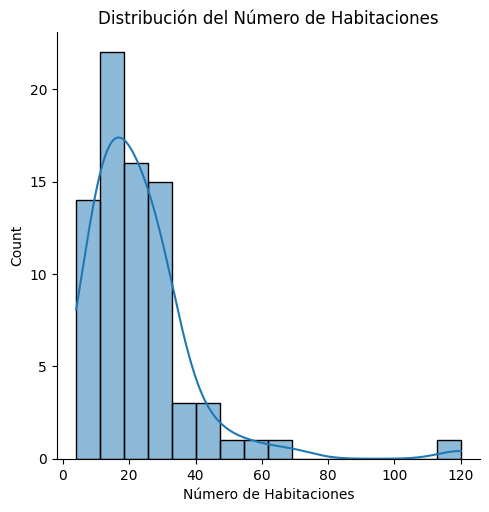

In [8]:
df_train['nro_habitaciones'] = pd.to_numeric(df_train['nro_habitaciones'].replace('ND', np.nan))


df_train = df_train.dropna(subset=['nro_habitaciones'])

sns.displot(df_train['nro_habitaciones'], kde=True)
plt.xlabel('Número de Habitaciones')
plt.title('Distribución del Número de Habitaciones')
plt.show()

Canviamos el nombre de particiones a 100:

<ipython-input-9-86f5298e9350>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['nro_habitaciones'] = pd.to_numeric(df_train['nro_habitaciones'].replace('ND', np.nan))


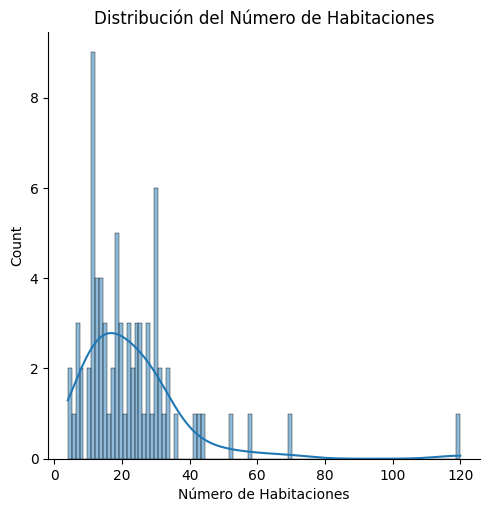

In [9]:
df_train['nro_habitaciones'] = pd.to_numeric(df_train['nro_habitaciones'].replace('ND', np.nan))


df_train = df_train.dropna(subset=['nro_habitaciones'])


sns.displot(df_train['nro_habitaciones'], bins=100, kde=True)
plt.xlabel('Número de Habitaciones')
plt.title('Distribución del Número de Habitaciones')
plt.show()

Y ahora con sólo 10:

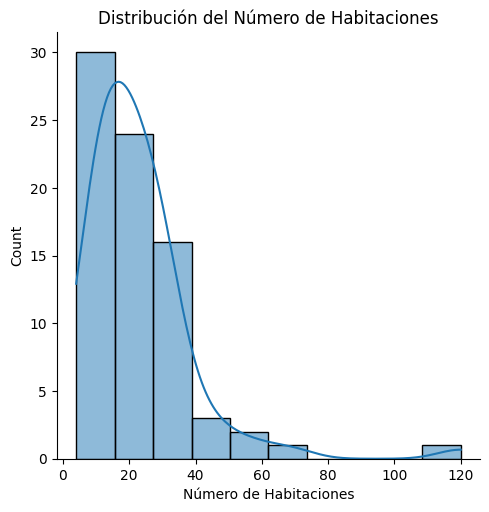

In [10]:

df_train['nro_habitaciones'] = pd.to_numeric(df_train['nro_habitaciones'].replace('ND', np.nan))


df_train = df_train.dropna(subset=['nro_habitaciones'])


sns.displot(df_train['nro_habitaciones'], bins=10, kde=True)
plt.xlabel('Número de Habitaciones')
plt.title('Distribución del Número de Habitaciones')
plt.show()

#### Diagrama de densidad

El diagrama de densidad también muestra la distribución de una variable numérica, y es muy parecido al histograma. El diagrama de densidad es una curva que suaviza la discontinuidad de las particiones del histograma y tiene un parámetre _bandwidth_ (`bw`) para controlar de qué manera se adapta a los datos.

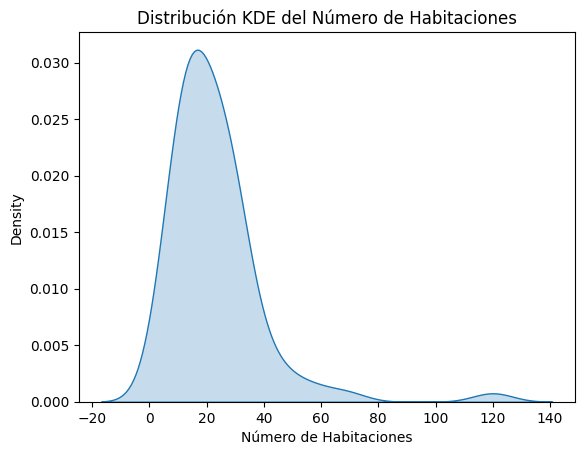

In [11]:
df_train['nro_habitaciones'] = pd.to_numeric(df_train['nro_habitaciones'].replace('ND', np.nan))


df_train = df_train.dropna(subset=['nro_habitaciones'])

sns.kdeplot(df_train['nro_habitaciones'], fill=True)
plt.xlabel('Número de Habitaciones')
plt.title('Distribución KDE del Número de Habitaciones')
plt.show()

El valor per defecto intenta hacer una buena adaptación pero puede ser útil probar otros valores.

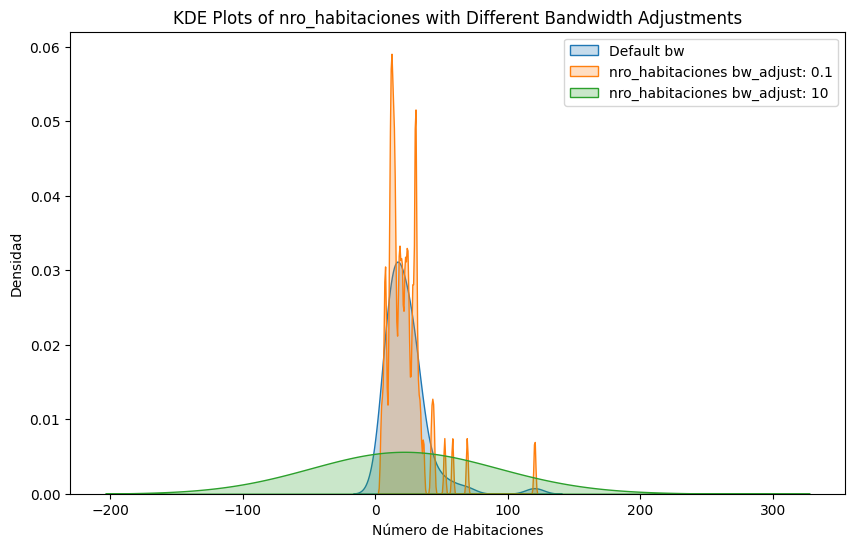

In [12]:
df_train['nro_habitaciones'] = pd.to_numeric(df_train['nro_habitaciones'].replace('ND', np.nan))


df_train = df_train.dropna(subset=['nro_habitaciones'])

plt.figure(figsize=(10, 6))
sns.kdeplot(df_train['nro_habitaciones'], fill=True, label='Default bw')
sns.kdeplot(df_train['nro_habitaciones'], fill=True, bw_adjust=0.1, label='nro_habitaciones bw_adjust: 0.1')
sns.kdeplot(df_train['nro_habitaciones'], fill=True, bw_adjust=10, label='nro_habitaciones bw_adjust: 10')

plt.legend()
plt.title('KDE Plots of nro_habitaciones with Different Bandwidth Adjustments')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Densidad')
plt.show()

### Diagrama de cajas y de violín

El diagrama de cajas nos da un sumario gráfico de una o varias variables. La línia que divide la caja en dos mitades representa el valor de la mediana de los datos. Los extremos de la caja muestras los cuartiles inferiores y superiores y las línias extremas los valores máximos y mínimos excluyendo los _outliers_. El diagrama de cajas pero, esconde parte de la información, como la distribución de los valores de la variable o el número de observaciones.

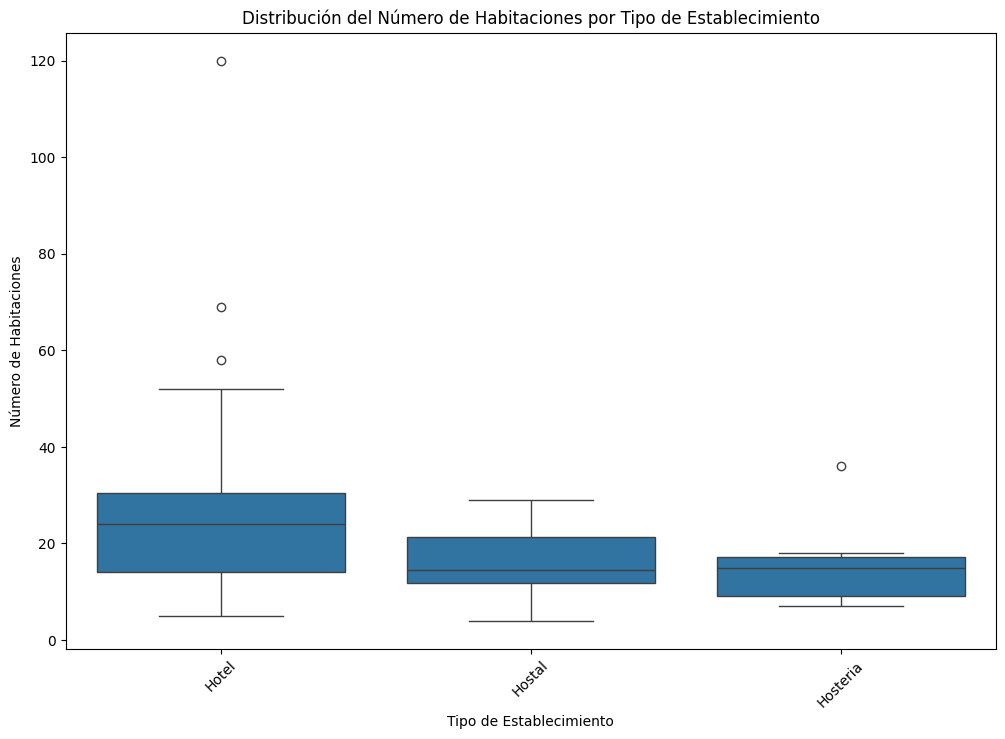

In [13]:
df_train = pd.read_csv('/content/drive/MyDrive/Actividad 6/data/gadcuenca_hosteleria_2022septiembre.csv', encoding='latin1')

df_train['nro_habitaciones'] = pd.to_numeric(df_train['nro_habitaciones'].replace('ND', np.nan))

df_train = df_train.dropna(subset=['nro_habitaciones'])

plt.figure(figsize=(12, 8))
sns.boxplot(x=df_train['tipo'], y=df_train['nro_habitaciones'])
plt.xlabel('Tipo de Establecimiento')
plt.ylabel('Número de Habitaciones')
plt.title('Distribución del Número de Habitaciones por Tipo de Establecimiento')
plt.xticks(rotation=45)
plt.show()

Podemos añadirle el detalle de las observaciones o _jitter_ con la función `swarmplot` de `Seaborn`.

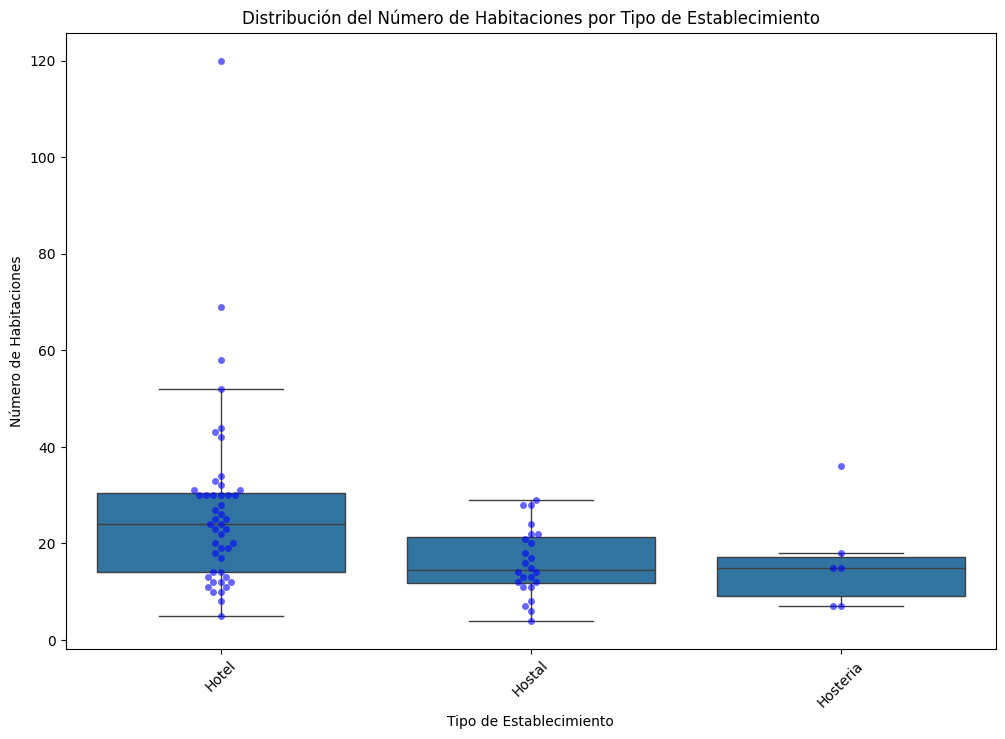

In [14]:
df_train['nro_habitaciones'] = pd.to_numeric(df_train['nro_habitaciones'].replace('ND', np.nan))


df_train = df_train.dropna(subset=['nro_habitaciones'])

plt.figure(figsize=(12, 8))

sns.swarmplot(x=df_train['tipo'], y=df_train['nro_habitaciones'], color='blue', alpha=0.6)

sns.boxplot(x=df_train['tipo'], y=df_train['nro_habitaciones'], whis=1.5, fliersize=0)

plt.xlabel('Tipo de Establecimiento')
plt.ylabel('Número de Habitaciones')
plt.title('Distribución del Número de Habitaciones por Tipo de Establecimiento')
plt.xticks(rotation=45)

plt.show()

En nuestro caso tenemos un número grande de observaciones y probablemente es mejor usar el diagrama de violín para ver la distribución de las variables.

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

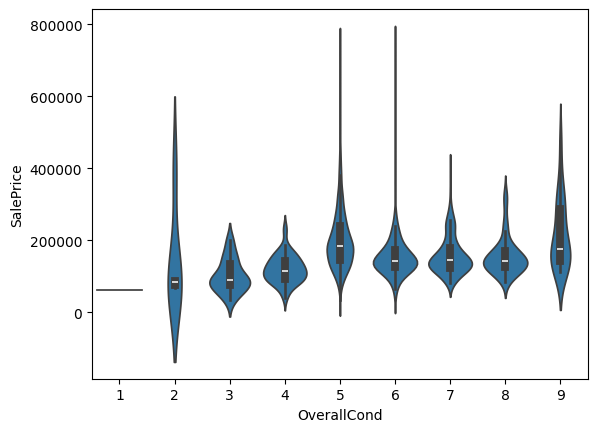

In [ ]:
sns.violinplot(x=df_train["OverallCond"], y=df_train["SalePrice"])

### Diagrama de dispersión

El diagrama de dispersión muestra la relación de dos variables en dos dimensiones. Cada punto representa una observación, y la posición en los ejes horitzontal y vertical representa el valor de las dos variables para aquella observación. Es un diagrama muy útil para estudiar la relación entre dos variables.

Mostramos la relación entre el precio de venda y los metros cuadrados de una vivienda. Como es de esperar, vemos una clara correlación entre las dos variables.

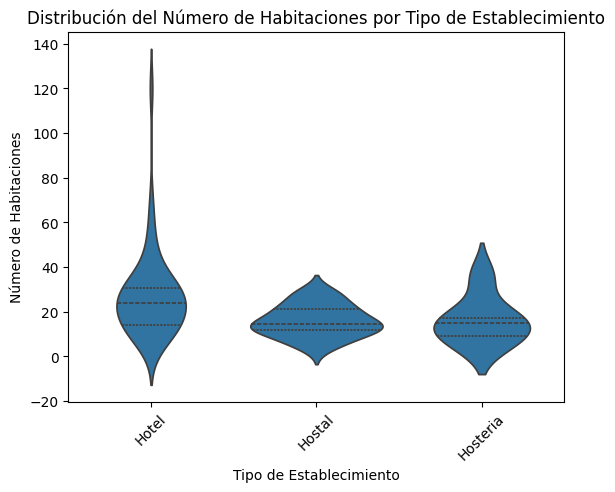

In [15]:
sns.violinplot(x=df_train['tipo'], y=df_train['nro_habitaciones'], inner='quartile')

plt.xlabel('Tipo de Establecimiento')
plt.ylabel('Número de Habitaciones')
plt.title('Distribución del Número de Habitaciones por Tipo de Establecimiento')
plt.xticks(rotation=45)

plt.show()


Podemos añadirle una tercera dimensión usando colores para codificar otra variable. En este caso, añadiremos la variable categórica `OverallQual` que corresponde a la calificación del habitaje y la mostraremos con un código de colores.

<ipython-input-17-ae0f043380a1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='nro_habitaciones', y='tipo', data=mean_nro_habitaciones, palette='viridis')


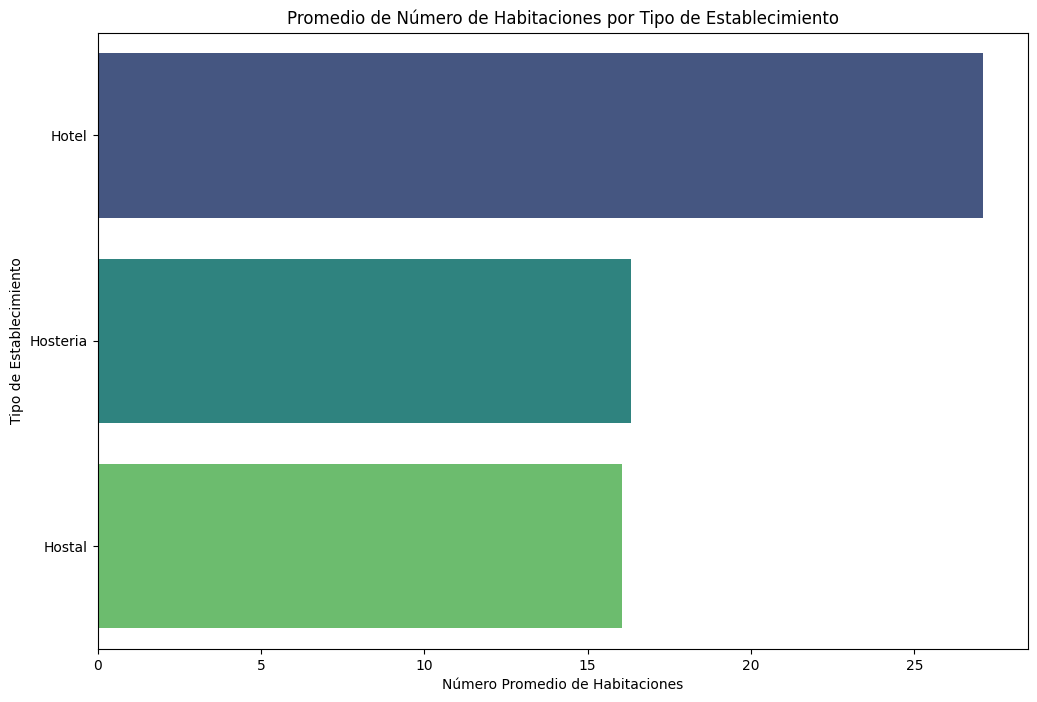

In [17]:
df_train['nro_habitaciones'] = pd.to_numeric(df_train['nro_habitaciones'].replace('ND', np.nan))

df_train = df_train.dropna(subset=['nro_habitaciones'])

mean_nro_habitaciones = df_train.groupby('tipo')['nro_habitaciones'].mean().reset_index()

mean_nro_habitaciones = mean_nro_habitaciones.sort_values(by='nro_habitaciones', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='nro_habitaciones', y='tipo', data=mean_nro_habitaciones, palette='viridis')

plt.xlabel('Número Promedio de Habitaciones')
plt.ylabel('Tipo de Establecimiento')
plt.title('Promedio de Número de Habitaciones por Tipo de Establecimiento')

plt.show()

La librería `Seaborn` nos permite crear visualizaciones más complejas, y añadirle un histograma para cada eje. A la vez, nos calcula el coeficiente de correlació de Pearson y el p-valor de la medida de correlación.

<Figure size 1000x800 with 0 Axes>

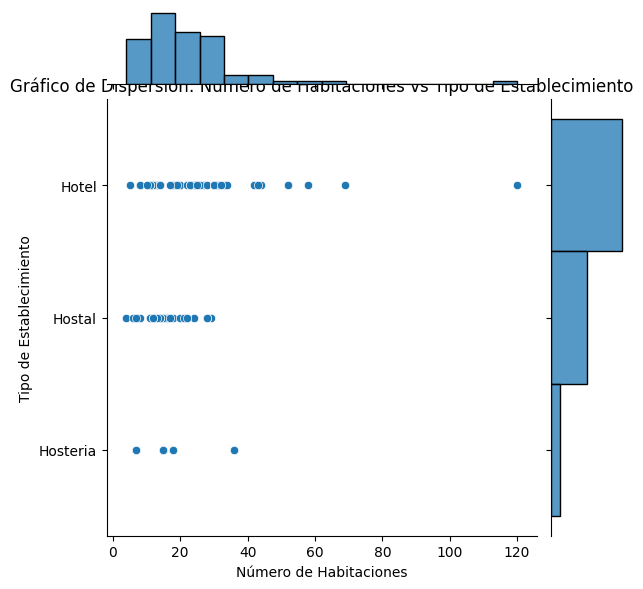

In [18]:
df_train['nro_habitaciones'] = pd.to_numeric(df_train['nro_habitaciones'].replace('ND', np.nan))

df_train = df_train.dropna(subset=['nro_habitaciones'])

plt.figure(figsize=(10, 8))

sns.jointplot(x='nro_habitaciones', y='tipo', data=df_train, kind='scatter')

plt.xlabel('Número de Habitaciones')
plt.ylabel('Tipo de Establecimiento')
plt.title('Gráfico de Dispersión: Número de Habitaciones vs Tipo de Establecimiento')

plt.show()

Si el hecho de tener muchas observaciones nos esconde la densidad de éstas, podemos usar un `hexbin plot`, que nos divide la cuadrícula en hexágonos y nos codifica con un color más intenso donde tenemos más densidad de observaciones.

<Figure size 1000x800 with 0 Axes>

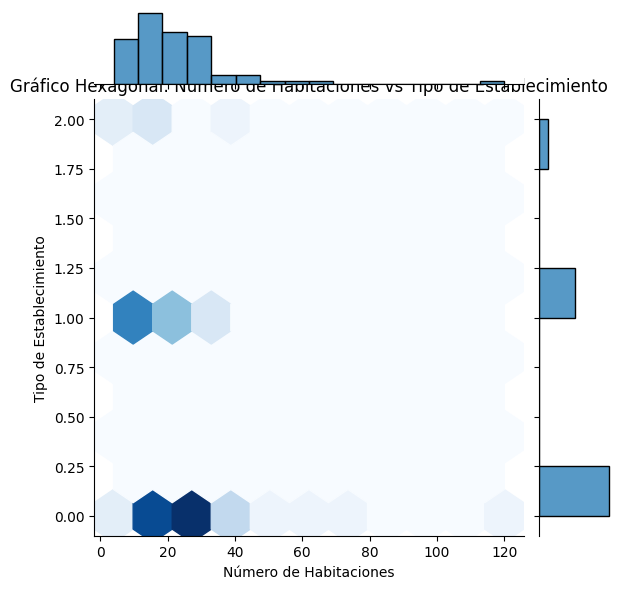

In [21]:
df_train['nro_habitaciones'] = pd.to_numeric(df_train['nro_habitaciones'].replace('ND', pd.NA), errors='coerce')

df_train = df_train.dropna(subset=['nro_habitaciones'])

tipo_mapping = {tipo: i for i, tipo in enumerate(df_train['tipo'].unique())}
df_train['tipo_num'] = df_train['tipo'].map(tipo_mapping)

plt.figure(figsize=(10, 8))

sns.jointplot(x='nro_habitaciones', y='tipo_num', data=df_train, kind='hex', cmap='Blues')

plt.xlabel('Número de Habitaciones')
plt.ylabel('Tipo de Establecimiento')
plt.title('Gráfico Hexagonal: Número de Habitaciones vs Tipo de Establecimiento')

plt.show()

### Mapa de calor

El mapa de calor es una representación gráfica de los datos donde los valors de una matriz són representados con colores. Es útil para representar visualmente una matriz numérica de datos.

En el siguiente ejemplo, calcularemos la correlación entre diversas variables del conjunto de datos y la mostraremos visualmente con un mapa de calor.

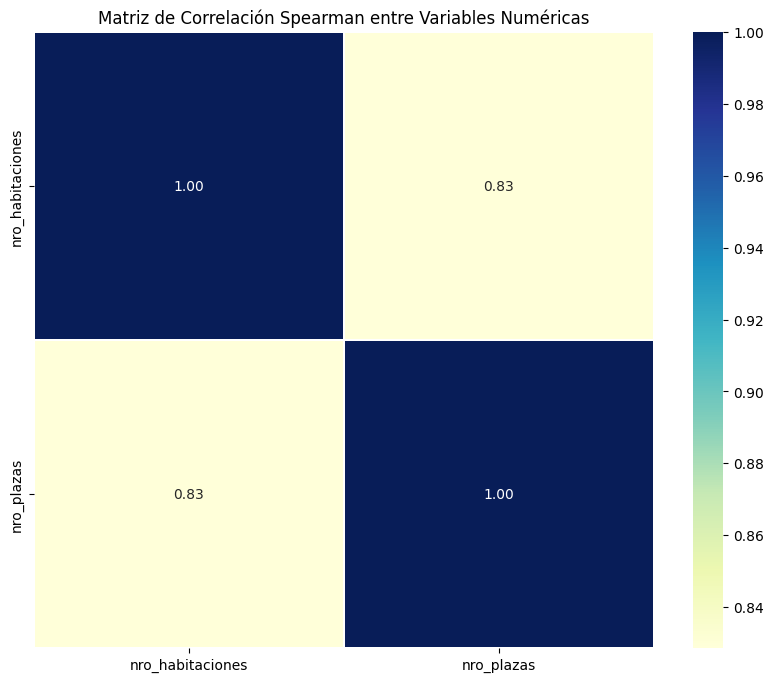

In [23]:
df_train['nro_habitaciones'] = pd.to_numeric(df_train['nro_habitaciones'].replace('ND', np.nan), errors='coerce')
df_train['nro_plazas'] = pd.to_numeric(df_train['nro_plazas'].replace('ND', np.nan), errors='coerce')

df_numeric = df_train[['nro_habitaciones', 'nro_plazas']]

df_numeric = df_numeric.dropna()

corrmat = df_numeric.corr(method='spearman')

k = 2

cols = corrmat.nlargest(k, 'nro_habitaciones')['nro_habitaciones'].index

cm = np.corrcoef(df_numeric[cols].values.T)

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.1, yticklabels=cols.values, xticklabels=cols.values)

plt.title('Matriz de Correlación Spearman entre Variables Numéricas')

plt.show()

Mapa de texto

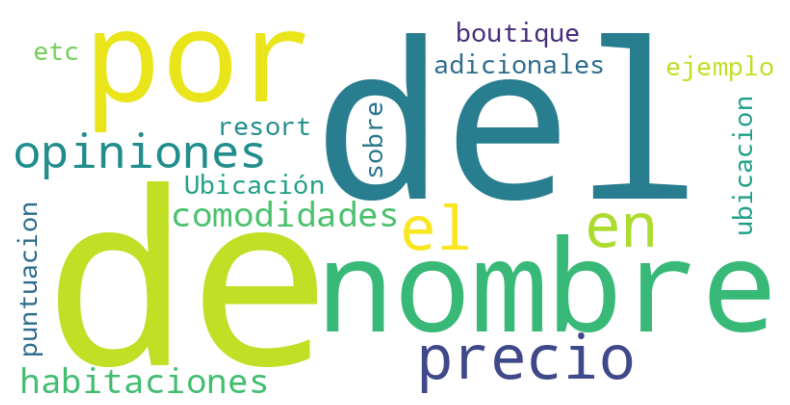

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

column_descriptions = """
nombre: Nombre del hotel
ubicacion: Ubicación del hotel
tipo: Tipo de hotel (por ejemplo, resort, boutique, etc.)
precio: Precio promedio por noche
estrellas: Calificación de estrellas del hotel
servicios: Servicios disponibles en el hotel
opiniones: Opiniones de clientes sobre el hotel
habitaciones: Número de habitaciones disponibles
reservas: Número de reservas realizadas
comodidades: Comodidades adicionales ofrecidas
puntuacion: Puntuación del hotel basada en diversas métricas
"""

text_data = " ".join(column_descriptions.split("\n"))

stopwords = set(STOPWORDS)
stopwords.update(["hotel", "tipo", "promedio", "noche", "calificación", "estrellas", "clientes", "servicios", "disponibles", "número", "reservas", "realizadas", "adicional", "ofrecidas", "puntuación", "basada", "diversas", "métricas"])

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


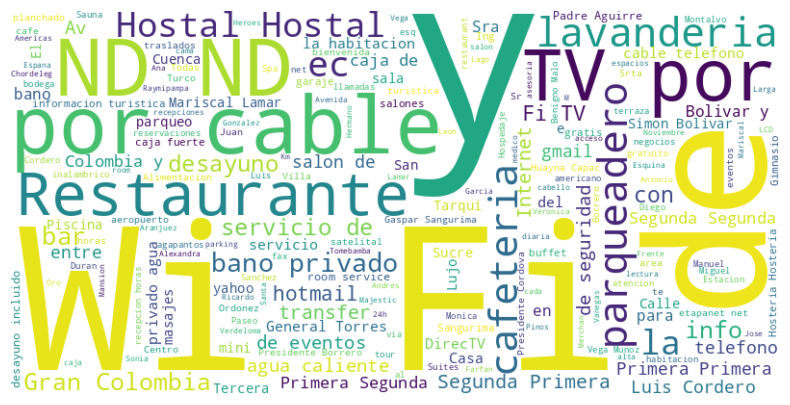

In [25]:
text_columns = df_train.select_dtypes(include=['object']).columns

text_data = " ".join(df_train[col].astype(str).str.cat(sep=' ') for col in text_columns)

stopwords = set(STOPWORDS)
stopwords.update(["hotel", "tipo", "ubicación", "servicios", "opiniones", "comodidades", "puntuación", "precio", "estrellas", "reservas", "habitaciones", "número", "promedio", "noche", "calificación"])

wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Conclusión

En esta actividad hemos visto algunas de las visualizaciones más comunes y ejemplos de cómo implementarlas en las librerías `Matplotlib` y `Seaborn`. La clave para una buena visualización de los datos es tener claro qué gráfico escoger y por qué, dependiendo de la naturaleza de los datos, y después saber escoger la herramienta para hacerlo posible.

## Bibliografía

Keim, D. A., Mansmann, F., Schneidewind, J., Thomas, J., & Ziegler, H. (2008). Visual analytics: Scope and challenges. In Visual data mining (pp. 76-90). Springer, Berlin, Heidelberg.

Minguillón, J. (2017). Anàlisi visual de dades: conceptes bàsics i eines. Item: revista de biblioteconomia i documentació, 2(63).